In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import selenium
from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
import time

# Instructions

     • All questions are compulsory.
     • In each of the questions you have to automate the process. You do not have to click on any button, click
       any clickable element, enter keywords in search boxes manually. Each process has to be performed via
       coding.
     • Q1 and Q2 are connected questions i.e. after attempting Q1 proceed to Q2. Do not write whole code
       from beginning for Q2.
     • You may use any web scraping library and tools.
     • The question can be attempted in various ways; the correctness of question depends on the output.
     • If you encounter any Null values during scraping, you may replace it by hyphen.

## Q1.
          Write a python program which searches all the product under a particular product from www.amazon.in.
 
          The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’.
 
          Then search for guitars.


## Q2.
          In the above question, now scrape the following details of each product listed in first 3 pages of your
          search results and save it in a data frame and csv.
 
          In case if any product has less than 3 pages in search
          results then scrape all the products available under that product name.
 
          Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery",   
          "Availability" and “Product URL”.
 
         In case, if any of the details are missing for any of the product then replace it by “-“.

In [ ]:
driver = webdriver.Chrome('chromedriver.exe')   # Creating Instance Of WebDriver
def scraper1(u,p):                              # Defining Function With Two Parameters(URL And Product Name)
    driver.get(u)                               # Loading Webpage 
    time.sleep(10)                              # Assigning 10 seconds Of Sleep Time To Get The Page Loaded Properly
    driver.maximize_window()                    # Maximizing Browser Window
    time.sleep(5)
    # Sending Input To The Search Field And Clicking On Search Button
    driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input").send_keys(p)
    driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input").click()
    time.sleep(10)                              # Assigning 10 seconds Of Sleep Time To Get The Page Loaded Properly
    # Creating A DataFrame With Required Columns
    Amazon_Product_Detail = pd.DataFrame([], columns=["Name of the Product", "Brand Name",  "Price", "Return/Exchange",
                                                     "Expected Delivery", "Availability", "Product URL"])
    # Logic To Fetch All The Required Information From The Website
    for page in range(3):
        time.sleep(10)
        items = driver.find_elements(By.XPATH, '//div[@data-component-type="s-search-result"]')
        for i in items:
            values = []
            i.click()
            try:
                WebDriverWait(driver, 30).until(EC.number_of_windows_to_be(2))
            except selenium.common.exceptions.TimeoutException:
                time.sleep(10)
                continue
            driver.switch_to.window(driver.window_handles[1])
            try:
                productName = driver.find_element(By.XPATH, '//div[@id="titleSection"]').text
                if productName:
                    values.append(productName)
                else:
                    raise
            except Exception as e:
                values.append("#")
            try:
                brandName = driver.find_element(By.XPATH, '//*[@id="productOverview_feature_div"]/div/table/tbody/tr[1]/td[2]/span').text
                if brandName:
                    values.append(brandName)
                else:
                    raise
            except Exception as e:
                values.append("#")
            try:
                price = driver.find_element(By.XPATH, '//*[@id="corePrice_feature_div"]/div/span').text.split('₹')[1].split('\n')[0]
                if price:
                    values.append(price)
                else:
                    raise
            except Exception as e:
                values.append("#")
            try:
                returnPolicy = driver.find_element(By.XPATH, '//div[@id="RETURNS_POLICY"]').text
                if returnPolicy:
                    values.append("Available - "+returnPolicy)
                else:
                    raise
            except Exception as e:
                values.append("#")
            try:
                delivery = driver.find_element(By.XPATH, '//div[@id="mir-layout-DELIVERY_BLOCK"]//b').text
                if delivery:
                    values.append(delivery)
                else:
                    raise
            except Exception as e:
                values.append("#")
            try:
                available = driver.find_element(By.XPATH, '//div[@id="availability"]').text
                if available:
                    values.append("Yes")
                else:
                    raise
            except Exception as e:
                values.append("#")
            try:
                productUrl = driver.current_url
                if productUrl:
                    values.append(productUrl)
                else:
                    raise
            except Exception as e:
                values.append("#")

            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            Amazon_Product_Detail.loc[len(Amazon_Product_Detail)] = values

        try:
            driver.find_element_by_xpath('//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]').click()
        except Exception:
            break    
    # Saving DataFrame Into A CSV File
    Amazon_Product_Detail.to_csv("Amazon_Product.csv", index=False)
    # Printing DataFrame
    print(Amazon_Product_Detail)
# Taking Desired Product As Input From User
product = input("Enter the Product Of Your Choice : ")
url = "https://www.amazon.in/"
scraper1(url, product)                   # Calling Function And Passing URL And User Input As Arguments

## Q3.
           Write a python program to access the search bar and search button on images.google.com and

           scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
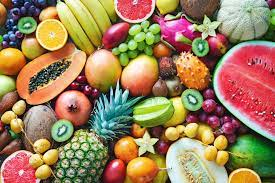
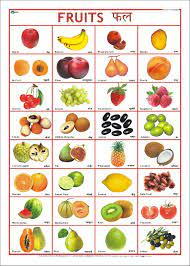
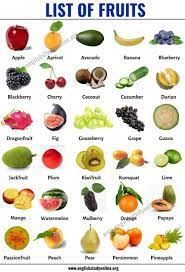
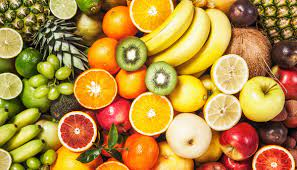
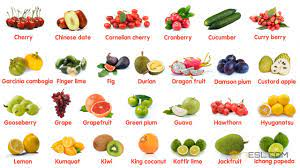
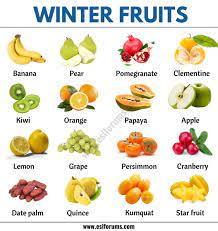
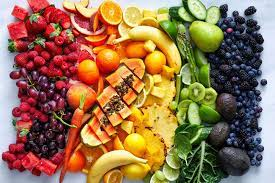
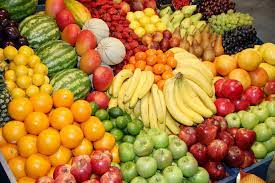
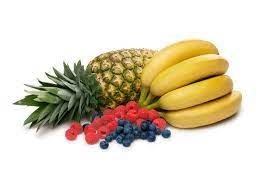
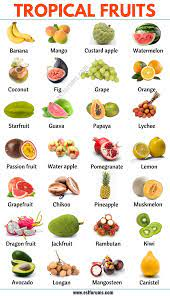
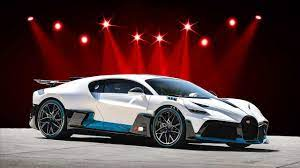
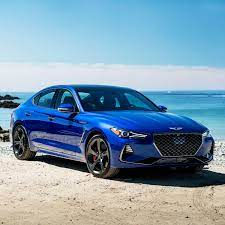
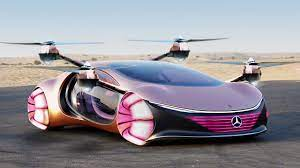
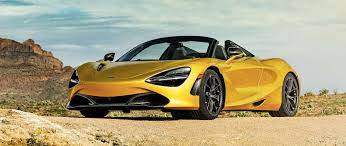
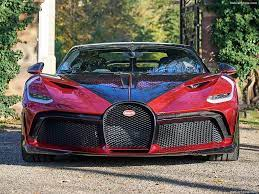
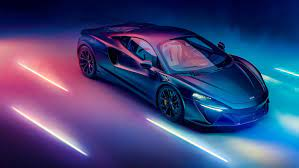
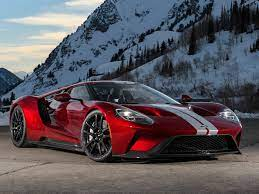
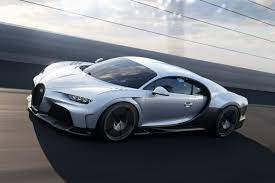
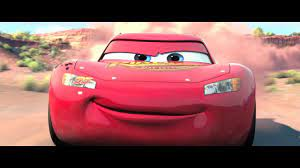
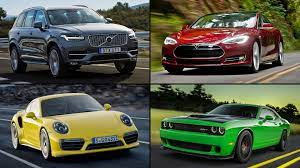
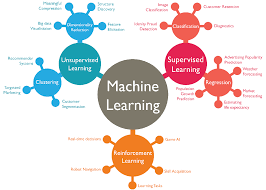
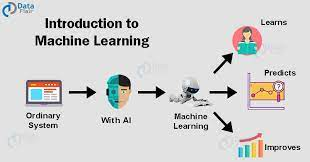
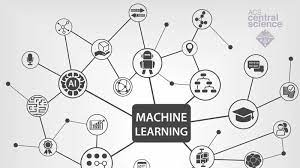
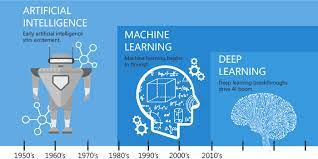
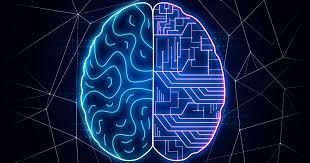
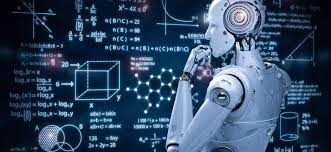
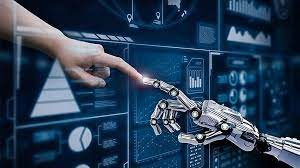
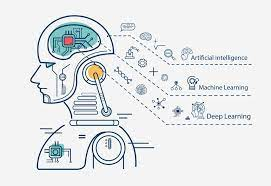
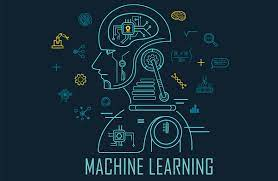
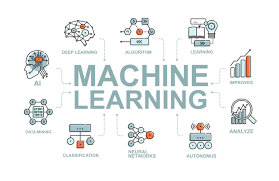
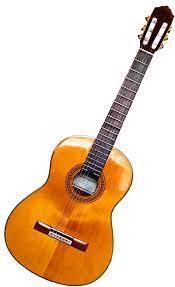
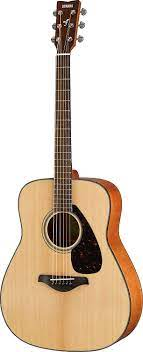
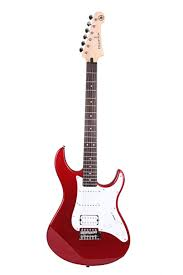
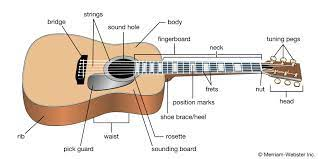
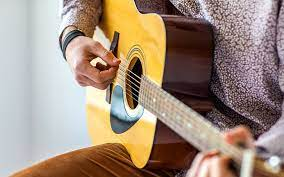
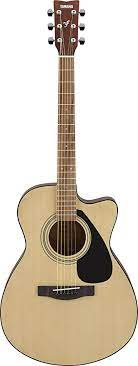
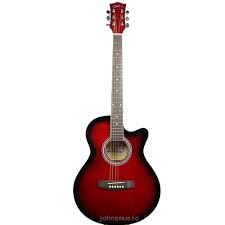
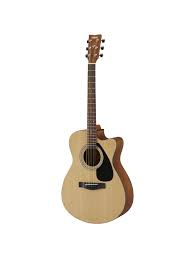
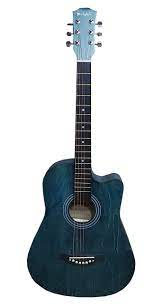
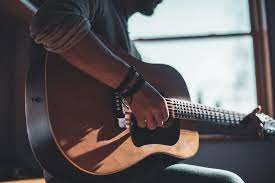
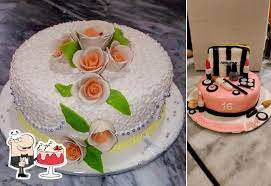
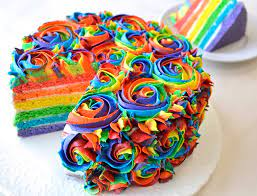
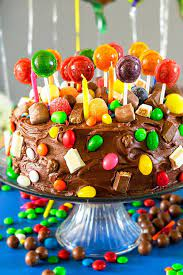
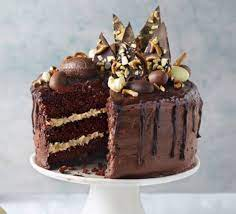
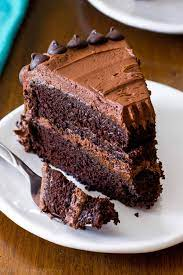
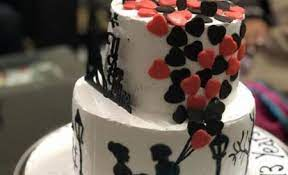
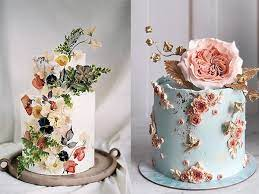
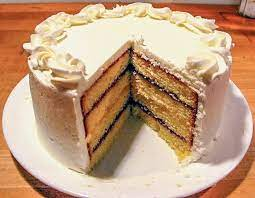
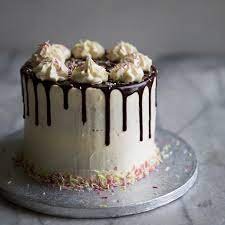
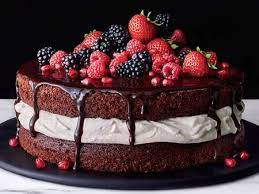

In [40]:
driver=webdriver.Chrome('chromedriver.exe')        # Creatng Instance Of WebDriver
def scraper3(a, c):                                # Defining Function With Two Parameters(URL And List Of Items) 
    driver.get(a)                                  # Loading Website
    driver.maximize_window()                       # Maximizing Browser Window
    time.sleep(5)
    image_dict = {}

    # Logic To Scrape Required Information
    for keyword in images:
        search_field = driver.find_element(By.XPATH, '//input[@title="Search"]')
        search_field.send_keys(keyword)
        search_field.send_keys(Keys.ENTER)
        time.sleep(5)

        for i in range(10):
            if keyword in image_dict.keys():
                image_dict[keyword].append(driver.find_element(By.XPATH, '//div[@data-ri="{}"]/a[1]/div/img'.format(str(i))).get_attribute("src"))
            else:
                image_dict[keyword] = [driver.find_element(By.XPATH, '//div[@data-ri="{}"]/a[1]/div/img'.format(str(i))).get_attribute("src")]
        search_field = driver.find_element(By.XPATH, '//input[@title="Search"]')
        search_field.clear()
    Images_df = pd.DataFrame(image_dict)
    # Printing DataFrame
    print(Images_df)
# URL Of Website
url = "https://images.google.com/"
images = ['Fruits', 'Cars', 'Machine Learning', 'Guitar', 'Cakes']       # List Of Given Items
scraper3(url, images)               # Calling Function And Passing URL And List Of Items As Arguments

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")

def scraper3(a, c):
    driver.get(a)
    driver.maximize_window()
    time.sleep(5)

    image_dict = {}

    for keyword in images:
        search_field = driver.find_element(By.XPATH, '//input[@title="Search"]')
        search_field.send_keys(keyword)
        search_field.send_keys(Keys.ENTER)
        time.sleep(5)
        for i in range(10):
            if keyword in image_dict.keys():
                image_dict[keyword].append(driver.find_element(By.XPATH, '//div[@data-ri="{}"]/a[1]/div/img'.format(str(i))).get_attribute("src"))
            else:
                image_dict[keyword] = [driver.find_element(By.XPATH, '//div[@data-ri="{}"]/a[1]/div/img'.format(str(i))).get_attribute("src")]
        search_field = driver.find_element(By.XPATH, '//input[@title="Search"]')
        search_field.clear()

    Images_df = pd.DataFrame(image_dict)
    print(Images_df)

url = "https://images.google.com/"
images = ['Fruits', 'Cars', 'Machine Learning', 'Guitar', 'Cakes']
scraper3(url, images)

## Q4. 

      Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
      www.flipkart.com and
      Scrape following details for all the search results displayed on 1st page.
      
      Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary 
      Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. 
      
      Incase if any of the details is missing then replace it by “- “.
      
      Save your results in a dataframe and CSV.
      

In [ ]:
driver=webdriver.Chrome('chromedriver.exe')           # Creating Instance Of Webdriver


def scraper4(c,phone):                                # Defining The Function With URL And Smartphone Name As Arguments
    driver.get(c)                                     # Loading Webpage
    driver.maximize_window()                          # Maximising The Chrome Browser Window
    time.sleep(5)                                     # Making Driver To Wait For 5 Seconds
    popup=driver.find_element_by_xpath('//button[@class="_2KpZ6l _2doB4z"]').click()       # Closing PopUp Window 
    # Finding Search Field Using XPATH And Passing User Input Into It
    search_field=driver.find_element_by_class_name("_3704LK").send_keys(phone) 
    # Finding Search Button Using XPATH And Clicking On it
    search_button=driver.find_element_by_class_name("L0Z3Pu").click()        
    time.sleep(5)                                     # Making Driver To Wait For 5 Seconds
    # Creating Empty Lists To Store Desired Values In Them    
    brand_names=[]
    sphone_names=[]
    colours=[]
    ram=[]
    rom=[]
    displays=[]
    batteries=[]
    prices=[]
    product_urls=[]
    
    # Finding Web Elements Related To each Desired Output To Extract Desired Information From Them 
    brand_tags=driver.find_elements_by_xpath('//div[@class="_1AtVbE col-12-12"]//child::div[@class="_4rR01T"]')
    memory_tags=driver.find_elements_by_xpath('//div[@class="col col-7-12"]//li[@class="rgWa7D"][1]')
    display_tags=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[2]')
    battery_tags=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[4]')
    price_tags=driver.find_elements_by_xpath('//div[@class="_30jeq3 _1_WHN1"]')
    url_tags=driver.find_elements_by_xpath(('//a[@class="_1fQZEK"]'))
    
    
    for b in brand_tags:                   
        brand_names.append(b.text.split(' ')[0])
        sphone_names.append(b.text.split('(')[0].strip())
        colours.append((b.text.split('(')[-1]).split(',')[0])
    for m in memory_tags:
        ram.append(m.text.split('|')[0].strip())
        rom.append(m.text.split('|')[1].strip())
    for d in display_tags:
        displays.append(d.text)
    for bt in battery_tags:
        batteries.append(bt.text)
    for p in price_tags:
        prices.append(p.text)
    for u in url_tags:
        product_urls.append(u.get_attribute('href'))
    # Creating A Dictionary To Store Required Information   
    info_dict={"Brand Of Device":brand_names,"Name Of Device":sphone_names,
               'Colour Of Device':colours,'RAM Of Device':ram,'ROM Of Device':rom,'Display Size Of Device':displays,
               'Battery Capacity Of Device':batteries,'Price Of Device':prices,'URL Of Device Page':product_urls}
    # Creating DataFrame
    df=pd.DataFrame(info_dict)
    df.index=range(1,len(df)+1)
    # Saving DataFrame In CSV Format
    df.to_csv('Products.csv')
    print(df)                                                                            
# Taking User Input For Smartphone Choice 
sphone=input("Enter the Smartphone You want to search for : ")
url='https://www.flipkart.com/'  
scraper4(url,sphone)                   # Calling Function And Passing URL And User Input As Arguments

## Q5.
         Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google
         maps.

In [ ]:
driver=webdriver.Chrome('chromedriver.exe')       # Creating Instance Of Webdriver
def scraper4(d,c):                                # Defining Function
    driver.get(d)                                 # loading Webpage
    driver.maximize_window()                      # Maximizing Chrome Window
    time.sleep(5)                                 # Making driver to wait for 5 Seconds
    
    search_field=driver.find_element_by_id('searchboxinput').send_keys(c)     # Finding Search Field And Sending Input
    search_button=driver.find_element_by_id('searchbox-searchbutton').click() # Finding Search Button And Clicking On It
    time.sleep(5)                                                             # Making driver to wait for 5 Seconds
    
    # Extracting City URL From Webpage
    city_url=driver.find_element_by_xpath('//a[@id="gb_70"]').get_attribute('href')
    
    # Using Regex Methods to Extract Longitude And Latitude Of Entered City
    city_longitude=city_url.split('%2F%40')[1].split('%2C1')[0].split('%2C')[0]
    city_latitude=city_url.split('%2F%40')[1].split('%2C1')[0].split('%2C')[1]
    
    # Printing Extracted Desired Outcomes
    print(f"Longitude Of {c.capitalize()} = {city_longitude}, Latitude Of {c.capitalize()} = {city_latitude}")

url='https://www.google.com/maps/@20.9880135,82.7525294,5z'   # URL Of The Google Maps Website
city=input("Enter City Of Your Choice :")                     # Taking User Input As City
scraper4(url,city)                                            # Passing URL And City As Parameters To The Function

## Q6.
        Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21)
        from trak.in

In [ ]:
def scraper6(a):
    driver.get(a)
    driver.maximize_window()
    time.sleep(5)

    Investment_Details = pd.DataFrame([], columns=["Sr.No.", "Date", "Startup Name", "Industry/Vertical", "Sub-Vertical",
                                               "City/Location", "Investor's Name", "Investment Type", "Amount (In USD)"])

    month_names = driver.find_elements(By.XPATH, '//h2[contains(@class,"tablepress-table-name")]')
    for month in month_names:
        if month.text in ['March, 2021', 'February, 2021', 'January, 2021']:
            table_id = month.get_attribute("class").split(' ')[1].split('-')[4]
            xpath_string = '//table[@id="tablepress-' + table_id + '"]//tbody/tr'
            values = [i.text for i in driver.find_elements(By.XPATH, xpath_string+'/td')]
            for i in range(0, len(values), 9):
                Investment_Details.loc[len(Investment_Details)] = values[i:i + 9]

    Investment_Details = Investment_Details[["Date", "Startup Name", "Industry/Vertical", "Sub-Vertical",
                                               "City/Location", "Investor's Name", "Investment Type", "Amount (In USD)"]]
    print(Investment_Details)

url = "https://trak.in/india-startup-funding-investment-2015/"
scraper6(url)

## Q7.
         Write a program to scrap all the available details of best gaming laptops from digit.in.

In [ ]:
def scraper7(a, key):
    driver.get(a)
    driver.maximize_window()
    time.sleep(5)

    Product_df = pd.DataFrame([], columns=["Laptop Name", "Laptop Image Link", "Description", "Price"])

    search_button = driver.find_element(By.XPATH, '//div[@class="search"]')
    search_button.click()
    search_field = driver.find_element(By.XPATH, '//input[@id="globalPageSearchText"]')
    search_field.send_keys(key)
    search_field.send_keys(Keys.ENTER)
    time.sleep(5)
    driver.find_element(By.XPATH, '//input[@id="content_products"]').click()
    for page in range(3):
        items = driver.find_elements(By.XPATH, '//div[@class="searchPage"]/a')
        for item in items:
            ActionChains(driver).key_down(Keys.CONTROL).click(item).key_up(Keys.CONTROL).perform()
            try:
                WebDriverWait(driver, 20)
            except selenium.common.exceptions.TimeoutException:
                time.sleep(10)
                continue
            driver.switch_to.window(driver.window_handles[1])
            try:
                productName = driver.find_element(By.XPATH, '//div[@class="heading-wraper"]/h1').text
            except Exception:
                productName = "#"
            try:
                productDescription = driver.find_element(By.XPATH, '//div[@class="para_container"]').text
            except Exception:
                productDescription = "#"
            try:
                productPrice = driver.find_element(By.XPATH, '//div[@class="price"]/h2/strong').text
            except Exception:
                productPrice = "#"
            try:
                productImagelink = driver.find_element(By.XPATH, '//div[@class="slideshow-item"]/img').get_attribute("src")
            except Exception:
                productImagelink = "#"

            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            Product_df.loc[len(Product_df)] = [productName, productImagelink, productDescription, productPrice]

        try:
            driver.find_element_by_xpath('//a[@title="Next Page"]').click()
        except Exception:
            break
    print(Product_df)

url = "https://www.digit.in/"
keyword = "Best Gaming Laptop"
scraper7(url, keyword)

## Q8.
        Write a python program to scrape the details for all billionaires from www.forbes.com.
        Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [37]:
driver = webdriver.Chrome("chromedriver.exe")

def scraper8(a):
    driver.get(a)
    driver.maximize_window()
    time.sleep(5)

    Billionaires_df = pd.DataFrame([], columns=["Rank", "Name", "Net Worth", "Age", "Citizenship", "Source", "Industry"])
    count = 0
    while True:
        count += 1
        time.sleep(5)
        if count == 2:
            WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//button[@class="tp-close tp-active"]'))).click()

        billionaire_rows = [item.text for item in driver.find_elements(By.XPATH, '//div[@class="table-row-group__container"]/div[@role="row"]')]

        for item in billionaire_rows:
            splitted_row_values = item.split('\n')
            if len(splitted_row_values) > 7:
                splitted_row_values.remove('★')
            Billionaires_df.loc[len(Billionaires_df)] = splitted_row_values

        try:
            driver.find_element(By.XPATH, '//button[@class="pagination-btn pagination-btn--next "]').click()
        except Exception:
            break

    print(Billionaires_df)

url = "https://www.forbes.com/billionaires/"
scraper8(url)

       Rank                                        Name Net Worth  Age  \
0        1.                                   Elon Musk    $219 B   50   
1        2.                                  Jeff Bezos    $171 B   58   
2        3.                    Bernard Arnault & family    $158 B   73   
3        4.                                  Bill Gates    $129 B   66   
4        5.                              Warren Buffett    $118 B   91   
5        6.                                  Larry Page    $111 B   49   
6        7.                                 Sergey Brin    $107 B   48   
7        8.                               Larry Ellison    $106 B   77   
8        9.                               Steve Ballmer   $91.4 B   66   
9       10.                               Mukesh Ambani   $90.7 B   64   
10      11.                       Gautam Adani & family     $90 B   59   
11      12.                           Michael Bloomberg     $82 B   80   
12      13.                   Carlos S

## Q9. 
          Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
          from any YouTube Video

In [ ]:
import itertools
driver=webdriver.Chrome('chromedriver.exe')
def scraper9(u):
    driver.get(u)
    driver.maximize_window()
    time.sleep(5)
    comments=[]
    upvotes=[]
    time_of_comment=[]
    count=0

    while count<=500:
        WebDriverWait(driver,10).until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        comment_box=WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@id="main"]')))
        for c in comment_box:
            comments.append(c.text)
            upvotes.append(cu.text)
            time_of_comment.append(ct.text)
            count+=1
    print(comments)
#     comment_info={'Comments':comments,'Upvotes On Comment':upvotes,'Time Of Comment':time_of_comment}
#     df=pd.DataFrame(comment_info)
#     print(df)
vid_url="https://www.youtube.com/watch?v=zR5-HbFW6hc"
scraper9(vid_url)
    

## Q10.
        Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
        “London” location. 
        You have to scrape hostel name, distance from city centre, ratings, total reviews,
        overall reviews, privates from price, dorms from price, facilities and property description.

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")

def scraper10(a, c):
    driver.get(a)
    driver.maximize_window()
    time.sleep(5)

    Hostel_Details = pd.DataFrame([], columns=["Hostel Name", "Distance from City Centre", "Ratings", "Total Reviews", "Overall Review",
                                               "Privates from price", "Dorms from price", "Facilities", "Property Description"])
    try:
        search_field = driver.find_element(By.XPATH, '//input[@id="location-text-input-field"]')
        search_field.send_keys(c)
        time.sleep(5)
        driver.find_element_by_xpath('//ul[@id="predicted-search-results"]/li[2]').click()
    except Exception as e:
        print("Exception raised:", e)

    try:
        driver.find_element_by_xpath('//div[@class="pagination-item pagination-next"]').click()
    except Exception:
        exit(-1)

    time.sleep(10)
    items = driver.find_elements(By.XPATH, '//div[@data-component-type="s-search-result"]')
#     for i in items:


url = "https://www.hostelworld.com/"
city = input("Please Enter the City in which you are looking for hostels :")
scraper10(url, city)